#$Name : Ankith Vijay$
#$SID: 862394125 $



1. Apply the normalization on the training and test data.

In [2]:
import numpy as np
from tensorflow.keras.datasets import mnist


def data():
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    
    # Reshaping
    x_train = x_train.reshape(x_train.shape[0], -1)
    x_test = x_test.reshape(x_test.shape[0], -1)
    
    # Z-Normalization
    x_train = (x_train - np.mean(x_train, axis=1, keepdims=True)) / np.std(x_train, axis=1, keepdims=True)
    x_test = (x_test - np.mean(x_test, axis=1, keepdims=True)) / np.std(x_test, axis=1, keepdims=True)
    
    # Adding bias term
    x_train = np.hstack((x_train, np.ones((x_train.shape[0], 1))))
    x_test = np.hstack((x_test, np.ones((x_test.shape[0], 1))))
    
    # Converting labels to binary
    y_train = np.where((0 <= y_train) & (y_train <= 4), 0, 1)
    y_test = np.where((0 <= y_test) & (y_test <= 4), 0, 1)
    
    return (x_train, y_train), (x_test, y_test)

(x_train, y_train), (x_test, y_test) = data()


11490434/11490434 [==============================] - 0s 0us/step


2. As a baseline, train a linear classifier $\hat{y} = \mathbf{v}^\mathrm{T} \mathbf{x}$ and quadratic loss. Report its test accuracy.


In [7]:
def f_linear(x, v):
    return np.dot(v, x)

def train_linear(x_train, y_train, x_test, y_test, epochs=10, learning_rate=0.0001, batch_size=10):
    n_samples, n_features = x_train.shape
    v = x_initialize((n_features,))

    for epoch in range(epochs):
        print(f"Epoch is: {epoch}")
        for batch_start in range(0, n_samples, batch_size):

            batch_end = min(batch_start + batch_size, n_samples)
            x_batch = x_train[batch_start:batch_end]
            y_batch = y_train[batch_start:batch_end]

            d_V = np.zeros_like(v)

            for x, y_true in zip(x_batch, y_batch):
                y_pred = f_linear(x, v)

                d_loss = 2 * (y_pred - y_true)
                d_V += (d_loss * x)

            v -= learning_rate * d_V / batch_size

    test_acc = test_accuracy2(x_test, y_test, None, v, classifier_type='linear')
    print(f"Test accuracy for linear classifier: {test_acc}")

    return test_acc

def test_accuracy2(x, y, W, v, classifier_type='nonlinear'):
    if classifier_type == 'nonlinear':
        y_pred = [f(x_i, W, v) for x_i in x]
    elif classifier_type == 'linear':
        y_pred = [f_linear(x_i, v) for x_i in x]
    y_pred = np.array(y_pred)
    y_pred = np.where(y_pred < 0.5, 0, 1)
    return np.mean(y_pred == y)

train_linear(x_train, y_train, x_test, y_test)


Epoch is: 0
Epoch is: 1
Epoch is: 2
Epoch is: 3
Epoch is: 4
Epoch is: 5
Epoch is: 6
Epoch is: 7
Epoch is: 8
Epoch is: 9
Test accuracy for linear classifier: 0.532


0.532

3. Train a neural network classifier with quadratic loss $l(y,f(x))=(y-f(x))^2$. Plot the progress of the test and training accuracy (y-axis) as a function of the iteration counter $t$ (x-axis). Report the final test accuracy for the following choices:
*   $k=5$
*   $k=40$
*   $k=200$

Comment on the role of hidden units $k$ on the ease of optimization and accuracy.


In [3]:
import matplotlib.pyplot as plt
def x_initialize(size):
    # return np.random.randn(*size) * np.sqrt(2 / np.prod(size[:-1]))
    return (np.random.randn(*size) * np.sqrt(2 / np.prod(size[:-1])) + 1e-8)

def relu(x):
    return np.maximum(x, 0)
    # return np.maximum(x + 1e-8, 0)

def f(x, W, v):
    return np.dot(v, relu(np.dot(W, x)))

def test_accuracy(x, y, W, v):
    y_pred = [f(x_i, W, v) for x_i in x]
    y_pred = np.array(y_pred)
    y_pred = np.where(y_pred < 0.5, 0, 1)
    return np.mean(y_pred == y)

Epoch is: 0 (k=5)
Training accrucacy is: 0.5066833333333334 in Iteration: 0
Training accrucacy is: 0.5377666666666666 in Iteration: 1000
Training accrucacy is: 0.5407333333333333 in Iteration: 2000
Training accrucacy is: 0.5542333333333334 in Iteration: 3000
Training accrucacy is: 0.5463333333333333 in Iteration: 4000
Training accrucacy is: 0.5468 in Iteration: 5000
Epoch is: 1 (k=5)
Training accrucacy is: 0.5543333333333333 in Iteration: 6000
Training accrucacy is: 0.5474666666666667 in Iteration: 7000
Training accrucacy is: 0.5457166666666666 in Iteration: 8000
Training accrucacy is: 0.5578333333333333 in Iteration: 9000
Training accrucacy is: 0.5521833333333334 in Iteration: 10000
Training accrucacy is: 0.5501833333333334 in Iteration: 11000
Epoch is: 2 (k=5)
Training accrucacy is: 0.5574 in Iteration: 12000
Training accrucacy is: 0.5513166666666667 in Iteration: 13000
Training accrucacy is: 0.5500833333333334 in Iteration: 14000
Training accrucacy is: 0.5608833333333333 in Iteratio

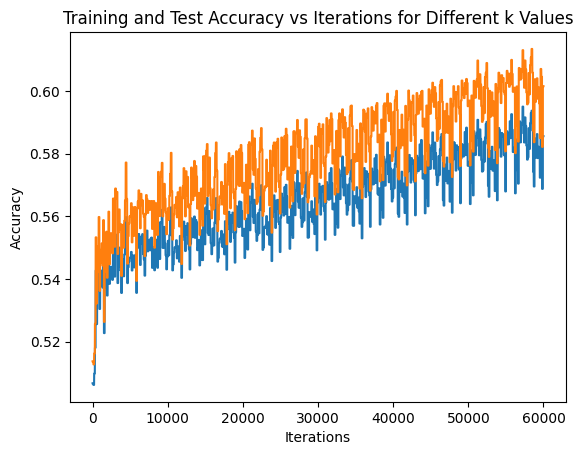

Epoch is: 0 (k=40)
Training accrucacy is: 0.56585 in Iteration: 0
Training accrucacy is: 0.5305 in Iteration: 1000
Training accrucacy is: 0.55375 in Iteration: 2000
Training accrucacy is: 0.5699666666666666 in Iteration: 3000
Training accrucacy is: 0.5866333333333333 in Iteration: 4000
Training accrucacy is: 0.6012166666666666 in Iteration: 5000
Epoch is: 1 (k=40)
Training accrucacy is: 0.60195 in Iteration: 6000
Training accrucacy is: 0.6122666666666666 in Iteration: 7000
Training accrucacy is: 0.6254166666666666 in Iteration: 8000
Training accrucacy is: 0.6232333333333333 in Iteration: 9000
Training accrucacy is: 0.62735 in Iteration: 10000
Training accrucacy is: 0.6319333333333333 in Iteration: 11000
Epoch is: 2 (k=40)
Training accrucacy is: 0.6340166666666667 in Iteration: 12000
Training accrucacy is: 0.6401333333333333 in Iteration: 13000
Training accrucacy is: 0.647 in Iteration: 14000
Training accrucacy is: 0.6426666666666667 in Iteration: 15000
Training accrucacy is: 0.64596666

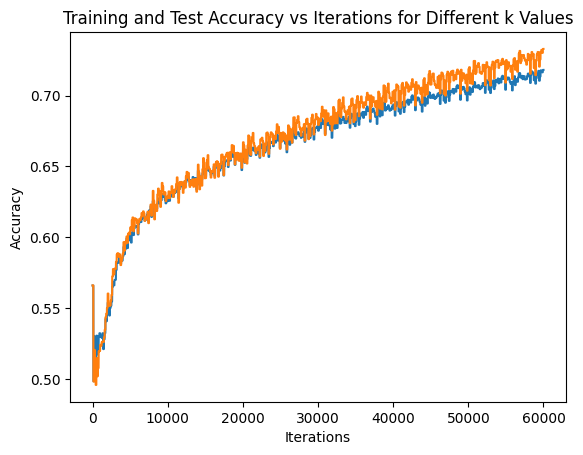

Epoch is: 0 (k=200)
Training accrucacy is: 0.48636666666666667 in Iteration: 0
Training accrucacy is: 0.57905 in Iteration: 1000
Training accrucacy is: 0.6112333333333333 in Iteration: 2000
Training accrucacy is: 0.63805 in Iteration: 3000
Training accrucacy is: 0.6574833333333333 in Iteration: 4000
Training accrucacy is: 0.6707333333333333 in Iteration: 5000
Epoch is: 1 (k=200)
Training accrucacy is: 0.6824333333333333 in Iteration: 6000
Training accrucacy is: 0.6958 in Iteration: 7000
Training accrucacy is: 0.7058333333333333 in Iteration: 8000
Training accrucacy is: 0.7150833333333333 in Iteration: 9000
Training accrucacy is: 0.7243166666666667 in Iteration: 10000
Training accrucacy is: 0.7304 in Iteration: 11000
Epoch is: 2 (k=200)
Training accrucacy is: 0.73695 in Iteration: 12000
Training accrucacy is: 0.7425166666666667 in Iteration: 13000
Training accrucacy is: 0.7480833333333333 in Iteration: 14000
Training accrucacy is: 0.7533166666666666 in Iteration: 15000
Training accrucac

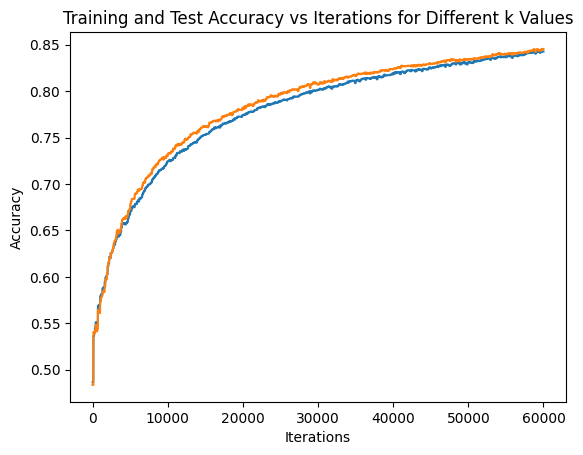

In [5]:
def train(x_train, y_train, x_test, y_test, k, epochs=10, learning_rate=0.0001, batch_size=10):
    n_samples, n_features = x_train.shape
    W = x_initialize((k, n_features))
    v = x_initialize((k,))

    test_accuracies = []
    train_accuracies = []

    iteration_count = 0
    for epoch in range(epochs):
        print(f"Epoch is: {epoch} (k={k})")
        for batch_start in range(0, n_samples, batch_size):
            
            batch_end = min(batch_start + batch_size, n_samples)
            x_batch = x_train[batch_start:batch_end]
            y_batch = y_train[batch_start:batch_end]
                
            d_W = np.zeros_like(W)
            d_V = np.zeros_like(v)

            for x, y_true in zip(x_batch, y_batch):
                relu_Wx = relu(np.dot(W, x))
                y_pred = np.dot(v, relu_Wx)

                d_loss = 2 * (y_pred - y_true)
                d_V += (d_loss * relu_Wx) 
                d_W += (d_loss * np.outer(v * (relu_Wx > 0), x)) 

            v -= learning_rate * d_V / batch_size
            W -= learning_rate * d_W / batch_size

            if iteration_count%100 == 0:
              train_acc = test_accuracy(x_train, y_train, W, v)
              test_acc = test_accuracy(x_test, y_test, W, v)
              if iteration_count%1000 == 0:
                print(f"Training accrucacy is: {train_acc} in Iteration: {iteration_count}")
            train_accuracies.append(train_acc)
            test_accuracies.append(test_acc)

            iteration_count += 1

    return train_accuracies, test_accuracies, iteration_count

k_values = [5, 40, 200]

for k in k_values:
    train_accuracies, test_accuracies, iteration_count = train(x_train, y_train, x_test, y_test, k)
    plt.plot(range(iteration_count), train_accuracies, label=f"k={k} (train)")
    plt.plot(range(iteration_count), test_accuracies, label=f"k={k} (test)")

    plt.xlabel("Iterations")
    plt.ylabel("Accuracy")
    plt.title("Training and Test Accuracy vs Iterations for Different k Values")
    plt.show()


4. Train a neural network classifier with logistic loss, namely $l(y, f(x)) = -y\log(\sigma(f(x))) - (1-y)\log(1-\sigma(f(x)))$ where $\sigma(x) = 1/(1 + e^{-x})$ is the sigmoid function. Repeat step 3.


Epoch is: 0 (k=5)
Training accuracy is: 0.5684333333333333 in Iteration: 0
Training accuracy is: 0.5872 in Iteration: 1000
Training accuracy is: 0.6026333333333334 in Iteration: 2000
Training accuracy is: 0.6150666666666667 in Iteration: 3000
Training accuracy is: 0.6213333333333333 in Iteration: 4000
Training accuracy is: 0.6260833333333333 in Iteration: 5000
Epoch is: 1 (k=5)
Training accuracy is: 0.62955 in Iteration: 6000
Training accuracy is: 0.6297166666666667 in Iteration: 7000
Training accuracy is: 0.6294833333333333 in Iteration: 8000
Training accuracy is: 0.62985 in Iteration: 9000
Training accuracy is: 0.6285666666666667 in Iteration: 10000
Training accuracy is: 0.632 in Iteration: 11000
Epoch is: 2 (k=5)
Training accuracy is: 0.6390666666666667 in Iteration: 12000
Training accuracy is: 0.6364666666666666 in Iteration: 13000
Training accuracy is: 0.6413 in Iteration: 14000
Training accuracy is: 0.6431333333333333 in Iteration: 15000
Training accuracy is: 0.6417666666666667 i

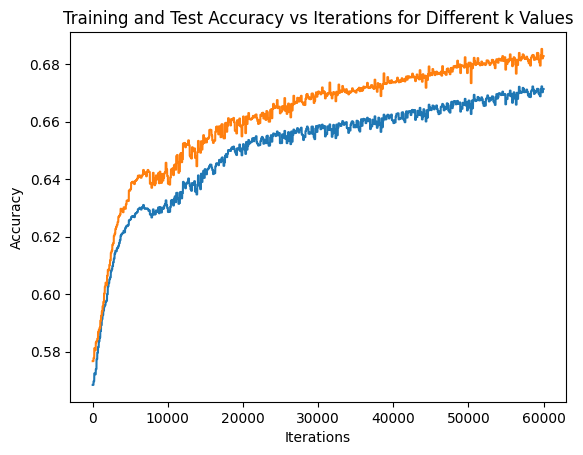

Epoch is: 0 (k=40)
Training accuracy is: 0.49606666666666666 in Iteration: 0
Training accuracy is: 0.658 in Iteration: 1000
Training accuracy is: 0.7069333333333333 in Iteration: 2000
Training accuracy is: 0.7303 in Iteration: 3000
Training accuracy is: 0.7478666666666667 in Iteration: 4000
Training accuracy is: 0.76595 in Iteration: 5000
Epoch is: 1 (k=40)
Training accuracy is: 0.7776 in Iteration: 6000
Training accuracy is: 0.7855666666666666 in Iteration: 7000
Training accuracy is: 0.79215 in Iteration: 8000
Training accuracy is: 0.7985 in Iteration: 9000
Training accuracy is: 0.8036833333333333 in Iteration: 10000
Training accuracy is: 0.8111166666666667 in Iteration: 11000
Epoch is: 2 (k=40)
Training accuracy is: 0.8159333333333333 in Iteration: 12000
Training accuracy is: 0.81885 in Iteration: 13000
Training accuracy is: 0.82215 in Iteration: 14000
Training accuracy is: 0.8262666666666667 in Iteration: 15000
Training accuracy is: 0.82915 in Iteration: 16000
Training accuracy is: 

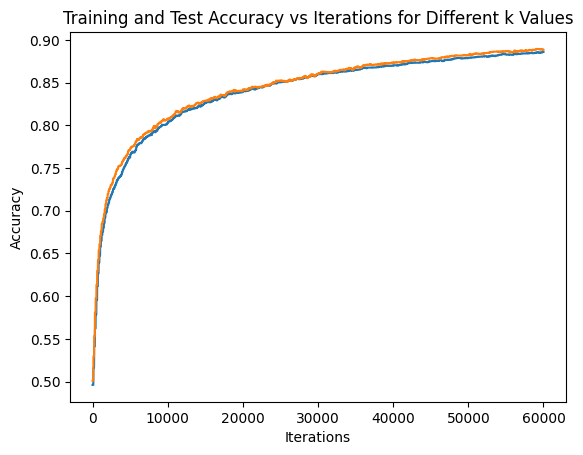

Epoch is: 0 (k=200)
Training accuracy is: 0.49728333333333335 in Iteration: 0
Training accuracy is: 0.7718333333333334 in Iteration: 1000
Training accuracy is: 0.81135 in Iteration: 2000
Training accuracy is: 0.84125 in Iteration: 3000
Training accuracy is: 0.8567166666666667 in Iteration: 4000
Training accuracy is: 0.8724 in Iteration: 5000
Epoch is: 1 (k=200)
Training accuracy is: 0.8805666666666667 in Iteration: 6000
Training accuracy is: 0.8895333333333333 in Iteration: 7000
Training accuracy is: 0.8917333333333334 in Iteration: 8000
Training accuracy is: 0.8995333333333333 in Iteration: 9000
Training accuracy is: 0.9032333333333333 in Iteration: 10000
Training accuracy is: 0.90765 in Iteration: 11000
Epoch is: 2 (k=200)
Training accuracy is: 0.9119833333333334 in Iteration: 12000
Training accuracy is: 0.9127333333333333 in Iteration: 13000
Training accuracy is: 0.9154833333333333 in Iteration: 14000
Training accuracy is: 0.91975 in Iteration: 15000
Training accuracy is: 0.92151666

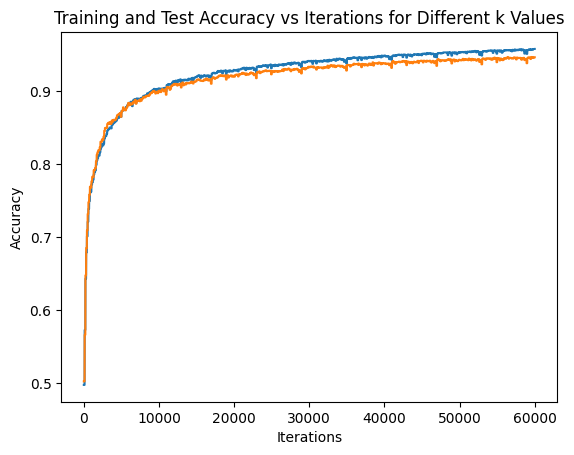

In [6]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def f1(x, W, v):
    return sigmoid(np.dot(v, relu(np.dot(W, x))))

def test_accuracy1(x, y, W, v):
    y_pred = [f1(x_i, W, v) for x_i in x]
    y_pred = np.array(y_pred)
    y_pred = np.where(y_pred < 0.5, 0, 1)
    return np.mean(y_pred == y)

def train1(x_train, y_train, x_test, y_test, k, epochs=10, learning_rate=0.0001, batch_size=10):
    n_samples, n_features = x_train.shape
    W = x_initialize((k, n_features))
    v = x_initialize((k,))

    test_accuracies = []
    train_accuracies = []

    iteration_count = 0
    for epoch in range(epochs):
        print(f"Epoch is: {epoch} (k={k})")
        for batch_start in range(0, n_samples, batch_size):
            
            batch_end = min(batch_start + batch_size, n_samples)
            x_batch = x_train[batch_start:batch_end]
            y_batch = y_train[batch_start:batch_end]
                
            d_W = np.zeros_like(W)
            d_V = np.zeros_like(v)

            for x, y_true in zip(x_batch, y_batch):
                relu_Wx = relu(np.dot(W, x))
                y_pred = sigmoid(np.dot(v, relu_Wx))

                d_loss = y_pred - y_true
                d_V += (d_loss * relu_Wx) 
                d_W += (d_loss * np.outer(v * (relu_Wx > 0), x)) 

            v -= learning_rate * d_V / batch_size
            W -= learning_rate * d_W / batch_size

            if iteration_count % 100 == 0:
                train_acc = test_accuracy1(x_train, y_train, W, v)
                test_acc = test_accuracy1(x_test, y_test, W, v)
                if iteration_count % 1000 == 0:
                    print(f"Training accuracy is: {train_acc} in Iteration: {iteration_count}")
            train_accuracies.append(train_acc)
            test_accuracies.append(test_acc)

            iteration_count += 1

    return train_accuracies, test_accuracies, iteration_count

k_values = [5, 40, 200]

for k in k_values:
    train_accuracies, test_accuracies, iteration_count = train1(x_train, y_train, x_test, y_test, k)
    plt.plot(range(iteration_count), train_accuracies, label=f"k={k} (train)")
    plt.plot(range(iteration_count), test_accuracies, label=f"k={k} (test)")

    plt.xlabel("Iterations")
    plt.ylabel("Accuracy")
    plt.title("Training and Test Accuracy vs Iterations for Different k Values")
    plt.show()


5. Comment on the difference between linear model and neural net. Comment on the differences between logistic and quadratic loss in terms of optimization and test/train accuracy.

#Linear models vs. neural networks:

It is easy and quick to train linear models since they presuppose a linear relationship between inputs and outputs. Neural networks are more flexible and powerful but take more computing power and time to train since they may learn complicated, non-linear correlations.

#Logistic loss vs. quadratic loss:

When utilized for classification problems, logistic loss offers a smoother optimization landscape and is sensitive to misclassifications. Regression tasks use quadratic loss, which is less sensitive to minute output variations and can have a more complicated optimization environment. The goal (classification or regression) and the desired performance and optimization characteristics all influence the loss function choice.